# Maximum Likelihood Estimation (MLE) for Linear Regression 

First import the necessary modules and configurations:

In [1]:
import matplotlib.pyplot as plt # For general plotting

import numpy as np

from scipy.optimize import minimize
from scipy.stats import multivariate_normal # MVN not univariate

np.set_printoptions(suppress=True)

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title

## Generate Synthetic Training Dataset

Generate a training dataset, $\mathcal{D} = \{(\mathbf{x}^{(i)}, y^{(i)}) \}_{i=1}^N$, with $N$ examples of input $\mathbf{x} \in \mathbb{R}^n$ and output $y \in \mathbb{R}$ pairs and assume a linear regression model as we did in the [Batch GD example](https://github.com/mazrk7/EECE5644_IntroMLPR_LectureCode_Summer1/blob/main/notebooks/ls_regression_batch_gd.ipynb):

\begin{equation*}
\mathbf{y} = \mathbf{X}\boldsymbol{\theta} + \boldsymbol{\epsilon}
\end{equation*}

Where $\mathbf{y} \in \mathbb{R}^N$ is the target vector, $\mathbf{X} \in \mathbb{R}^{N \times (n+1)}$ the <b>design matrix</b> and $\boldsymbol{\epsilon} \in \mathbb{R}^N$ is the vector of error terms.

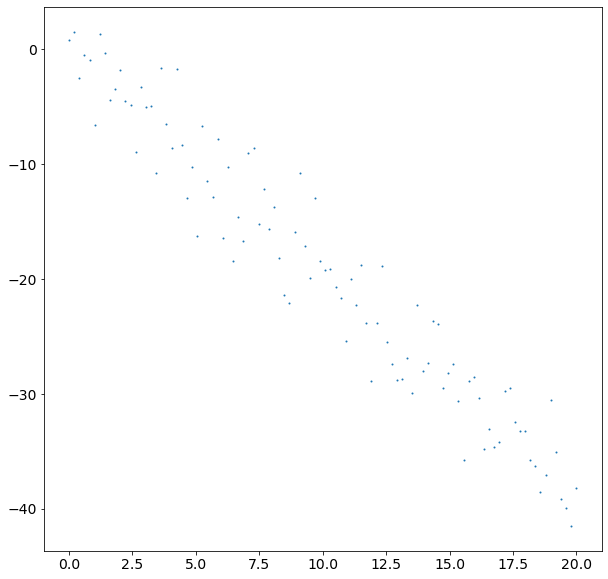

In [2]:
# Generating synthetic data

# Number of input samples to provide to algorithm
N = 100

X = np.linspace(0.0, 20, N)
X = np.column_stack((np.ones(N), X))  # Prepend column of ones to create augmented inputs x tilde

theta_true = np.array([0.7, -2]) # True parameter vector
theta0 = np.random.randn(X.shape[1]) # Random initialization

# y = X*theta_true + noise
y = X.dot(theta_true) + np.random.normal(0, 3, N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 1], y, s=1)
fig;

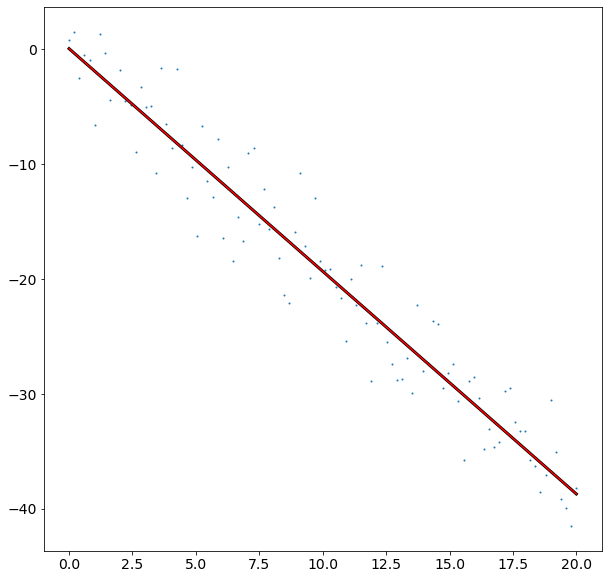

In [3]:
def analytical_solution(X, y):
    # Analytical solution is (X^T*X)^-1 * X^T * y 
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

theta_opt = analytical_solution(X, y)
analytical_preds = X.dot(theta_opt)

# Plot the OLS regression line on our original scatter plot
ax.plot(X[:, 1], analytical_preds, color='k', linewidth=3, label="OPT")

# Mean Squared Error (MSE) loss
def lin_reg_loss(theta, X, y):
    # Linear regression model X * theta
    predictions = X.dot(theta)
    # Residual error (X * theta) - y
    error = predictions - y
    # Loss function is MSE
    loss_f = np.mean(error**2)

    return loss_f

# Need to provide a function handle to the optimizer, which returns the loss objective, e.g. MSE
def func_mse(theta):
    return lin_reg_loss(theta, X, y)

# Minimize using a default unconstrained minimization optimization algorithm
mse_model = minimize(func_mse, theta0, tol=1e-6)
# res is the optimization result, has an .x property which is the solution array, e.g. theta*

# Predictions with our optimized theta
mse_preds = X.dot(mse_model.x)

# Plot the learned regression line on our original scatter plot
ax.plot(X[:, 1], mse_preds, color='red', label="MSE")
fig

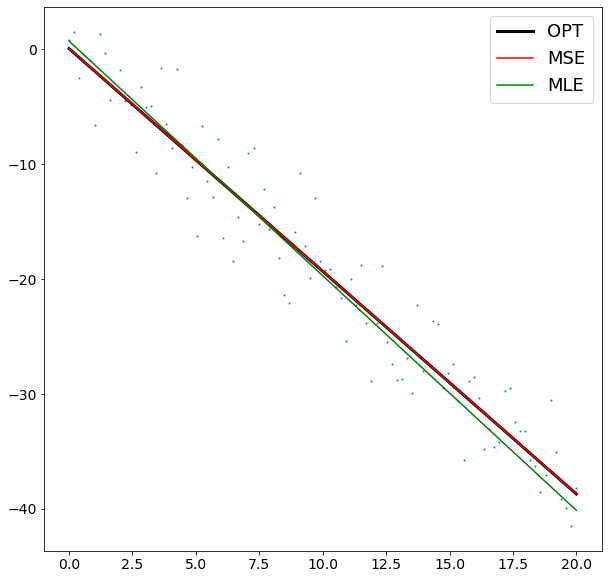

In [4]:
# Negative Log Likelihood (NLL) loss
def nll_loss(parameters, X, y, sigma=1):
    mu_pred = X.dot(parameters)
    
    # Compute log-likelihood function, setting mu=0 as we're estimating it
    log_lld = np.sum(multivariate_normal.pdf(y - mu_pred, 0, sigma))
    
    # Return NLL
    return -log_lld

# Adding PSD constraints on sigma
# def constraints(parameters):
#     sigma = parameters[2]
#     return sigma

# cons = {
#     'type': 'ineq',
#     'fun': constraints
# }

# Minimize NLL instead, assuming fixed variance of 1
sigma = 1
mle_model = minimize(nll_loss, theta0, args=(X, y, sigma), tol=1e-6)#, constraints=cons)

# Using parameters obtained from MLE estimate
nll_preds = X.dot(mle_model.x)

# Predictions with our MLE of theta
#samples = multivariate_normal.pdf(X, mu[c], Sigma[c])
ax.plot(X[:, 1], nll_preds, color='green', label="MLE")
ax.legend()
plt.show()
fig